In [1]:
import pandas as pd
import glob
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [11]:
gs3=pd.read_csv("../datasets/3_gs_corrected.csv")
gs3

,Run,DRB1,DRB1.1
0,SRR13280660,DRB1*04:01,DRB1*07:01
1,SRR13280707,DRB1*03:01,DRB1*15:01
2,SRR13280655,DRB1*03:01,DRB1*04:01
3,SRR13280656,DRB1*03:01,DRB1*04:01
4,SRR13280657,DRB1*03:01,DRB1*15:01
...,...,...,...
81,SRR13280738,DRB1*03:01,DRB1*15:01
82,SRR13280677,DRB1*03:01,DRB1*04:01
83,SRR13280737,DRB1*03:01,DRB1*13:01
84,SRR13280667,DRB1*03:01,DRB1*04:01


In [79]:
gs1=pd.read_csv("../datasets/1_gs.csv")
d1=pd.read_csv("../results/standard/arcas_d1_4dig.csv")

In [80]:
#select only DRB1 columns for d3 
d1=d1.set_index(d1.columns[0])
mask = d1.apply(lambda col: col.str.contains('A').any(),
                axis=0)
d1=d1.loc[: , mask]
d1=d1.reset_index()
d1=d1.iloc[: , :3]
d1.columns=['Run','A','A.1']
d1


,Run,A,A.1
0,ERR009111,A*03:01,A*24:02
1,ERR009133,A*03:01,A*03:336N
2,ERR009129,A*01:281Q,A*31:01
3,ERR009142,A*02:01,A*02:01
4,ERR009149,A*02:01,A*02:01
5,ERR009122,A*02:01,A*02:01
6,ERR009155,A*02:01,A*29:02
7,ERR009124,A*01:01,A*24:02
8,ERR009144,A*11:363,A*32:01
9,ERR009135,A*26:01,A*03:393


In [81]:
#select only DRB1 columns for d3 
gs1=gs1.set_index(gs1.columns[0])
mask = gs1.apply(lambda col: col.str.contains('A').any(),
                axis=0)
gs1=gs1.loc[: , mask]
gs1=gs1.reset_index()
gs1

,Run,A,A.1
0,ERR009159,A*03:01,A*02:01
1,ERR009168,A*02:01,A*32:01
2,ERR009154,A*02:01,A*68:01
3,ERR009147,A*68:xx,A*02:01
4,ERR009133,A*03:01,A*03:01
5,ERR009146,A*26:01,A*30:02
6,ERR009167,A*24:02,A*01:01
7,ERR009097,A*25:01,A*03:01
8,ERR009124,A*24:02,A*01:01
9,ERR009122,A*02:01,A*02:01


In [12]:
d3=pd.read_csv("../results/standard/arcas_d3.csv")
d3

,Run,A1,A2,B1,B2,C1,C2,DMA1,DMA2,DMB1,...,DRB1,DRB1.1,E1,E2,F1,F2,H1,H2,K1,K2
0,SRR13280725,A*02:01,A*02:01,B*44:02,B*15:01,C*05:01,C*03:04,DMA*01:01,DMA*01:01,DMB*01:01,...,DRB1*04:01,DRB1*01:01,E*01:01,E*01:03,F*01:01,F*01:01,H*01:01,H*01:01,K*01:02,K*01:02
1,SRR13280734,A*01:01,A*01:01,B*07:02,B*08:01,C*07:01,C*07:525,DMA*01:01,DMA*01:01,DMB*01:01,...,DRB1*15:01,DRB1*03:01,E*01:01,E*01:01,F*01:01,F*01:01,NaN,NaN,NaN,NaN
2,SRR13280659,A*01:01,A*02:01,B*51:01,B*08:01,C*07:01,C*14:02,DMA*01:01,DMA*01:01,DMB*01:03,...,DRB1*03:01,DRB1*13:01,E*01:01,E*01:03,F*01:01,F*01:01,NaN,NaN,NaN,NaN
3,SRR13280707,A*01:01,A*24:02,B*27:05,B*08:01,C*07:01,C*02:02,DMA*01:01,DMA*01:01,DMB*01:01,...,DRB1*15:01,DRB1*03:01,E*01:01,E*01:03,F*01:01,F*01:01,NaN,NaN,NaN,NaN
4,SRR13280670,A*01:01,A*03:01,B*08:01,B*15:01,C*07:01,C*03:04,DMA*01:01,DMA*01:01,DMB*01:01,...,DRB1*04:01,DRB1*03:01,E*01:01,E*01:03,F*01:01,F*01:03,H*02:01,H*02:04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,SRR13280709,A*02:01,A*02:01,B*15:01,B*57:01,C*03:04,C*06:02,DMA*01:01,DMA*01:01,DMB*01:03,...,DRB1*04:01,DRB1*04:01,E*01:01,E*01:03,F*01:01,F*01:01,NaN,NaN,K*01:02,K*01:02
82,SRR13280675,A*02:01,A*03:01,B*07:02,B*15:01,C*07:02,C*03:03,DMA*01:01,DMA*01:01,DMB*01:01,...,DRB1*14:54,DRB1*04:01,E*01:03,E*01:03,F*01:01,F*01:03,NaN,NaN,K*01:01,K*01:02
83,SRR13280702,A*02:01,A*02:01,B*07:02,B*08:01,C*07:02,C*07:970N,DMA*01:01,DMA*01:02,DMB*01:01,...,DRB1*03:01,DRB1*13:01,E*01:03,E*01:03,F*01:01,F*01:04,NaN,NaN,K*01:02,K*01:02
84,SRR13280686,A*01:01,A*02:01,B*08:01,B*51:01,C*07:01,C*14:02,DMA*01:01,DMA*01:01,DMB*01:03,...,DRB1*03:01,DRB1*13:01,E*01:01,E*01:03,F*01:01,F*01:01,NaN,NaN,K*01:01,K*01:02


In [13]:
#select only DRB1 columns for d3 
d3=d3.set_index(d3.columns[0])
mask = d3.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
d3=d3.loc[: , mask]
d3=d3.reset_index()
d3

,Run,DRB1,DRB1.1
0,SRR13280725,DRB1*04:01,DRB1*01:01
1,SRR13280734,DRB1*15:01,DRB1*03:01
2,SRR13280659,DRB1*03:01,DRB1*13:01
3,SRR13280707,DRB1*15:01,DRB1*03:01
4,SRR13280670,DRB1*04:01,DRB1*03:01
...,...,...,...
81,SRR13280709,DRB1*04:01,DRB1*04:01
82,SRR13280675,DRB1*14:54,DRB1*04:01
83,SRR13280702,DRB1*03:01,DRB1*13:01
84,SRR13280686,DRB1*03:01,DRB1*13:01


In [18]:
d3_dict=d3.set_index('Run').T.to_dict('list')
gs_dict=gs3.set_index('Run').T.to_dict('list')

In [20]:
d3_dict
gs_dict

{'SRR13280660': ['DRB1*04:01', 'DRB1*07:01'],
 'SRR13280707': ['DRB1*03:01', 'DRB1*15:01'],
 'SRR13280655': ['DRB1*03:01', 'DRB1*04:01'],
 'SRR13280656': ['DRB1*03:01', 'DRB1*04:01'],
 'SRR13280657': ['DRB1*03:01', 'DRB1*15:01'],
 'SRR13280658': ['DRB1*01:01', 'DRB1*04:01'],
 'SRR13280659': ['DRB1*03:01', 'DRB1*13:01'],
 'SRR13280661': ['DRB1*04:01', 'DRB1*07:01'],
 'SRR13280662': ['DRB1*03:01', 'DRB1*04:01'],
 'SRR13280663': ['DRB1*03:01', 'DRB1*15:01'],
 'SRR13280664': ['DRB1*04:01', 'DRB1*14:01'],
 'SRR13280665': ['DRB1*03:01', 'DRB1*15:01'],
 'SRR13280666': ['DRB1*01:01', 'DRB1*04:01'],
 'SRR13280669': ['DRB1*03:01', 'DRB1*13:01'],
 'SRR13280670': ['DRB1*03:01', 'DRB1*04:01'],
 'SRR13280671': ['DRB1*03:01', 'DRB1*13:01'],
 'SRR13280672': ['DRB1*03:01', 'DRB1*13:01'],
 'SRR13280673': ['DRB1*04:01', 'DRB1*04:04'],
 'SRR13280674': ['DRB1*03:01', 'DRB1*13:01'],
 'SRR13280675': ['DRB1*04:01', 'DRB1*14:01'],
 'SRR13280676': ['DRB1*04:01', 'DRB1*09:01'],
 'SRR13280678': ['DRB1*01:01', 'DR

In [109]:
mismatch_count=0
match=0
for index_i,row_i in d3.iterrows():
    for index_j, row_j in gs3.iterrows():
        if row_i[0]==row_j[0]: #checks if samples are the same bewteen prediction and gs 
            if row_i['DRB1'] != row_j['DRB1'] and row_i['DRB1'] != row_j['DRB1.1']:
                print(row_i['DRB1'][:10],row_j['DRB1'],row_j['DRB1.1'],row_i['Run'])
                mismatch_count+=1 
            elif row_i['DRB1.1'] != row_j['DRB1'] and row_i['DRB1.1'] != row_j['DRB1.1']:
                mismatch_count+=1
                print(row_i['DRB1.1'],row_j['DRB1'],row_j['DRB1.1'],row_i['Run'])
            else:
                match+=1
print(mismatch_count)
print(match)

DRB1*14:54 DRB1*04:01 DRB1*14:01 SRR13280716
DRB1*14:54 DRB1*04:01 DRB1*14:01 SRR13280692
DRB1*14:54 DRB1*04:01 DRB1*14:01 SRR13280735
DRB1*14:54 DRB1*04:01 DRB1*14:01 SRR13280664
DRB1*14:54 DRB1*04:01 DRB1*14:01 SRR13280675
5
81


In [101]:
for index_i,row_i in d3.iterrows():
    for index_j, row_j in gs3.iterrows():
        print(row_i[0])

SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR13280725
SRR1

In [97]:
mismatch_count=0
match=0
for index_i,row_i in d1.iterrows():
    for index_j, row_j in gs1.iterrows():
        if row_i['Run']==row_j['Run']:
            if row_i['A'][:7] != row_j['A'] and row_i['A'][:7] != row_j['A.1']:
                print(row_i['A'][:7],row_j['A'],row_j['A.1'],row_i['Run'],row_j['Run'])
                mismatch_count+=1 
            elif row_i['A.1'][:7] != row_j['A'] and row_i['A.1'][:7] != row_j['A.1']:
                mismatch_count+=1
                print(row_i['A.1'][:7],row_j['A'],row_j['A.1'],row_i['Run'],row_j['Run'])
            else:
                match+=1
            
print(mismatch_count)
print(match)

A*03:33 A*03:01 A*03:01 ERR009133 ERR009133
A*01:28 A*01:01 A*31:01 ERR009129 ERR009129
A*11:36 A*32:01 A*11:01 ERR009144 ERR009144
A*03:39 A*26:01 A*03:01 ERR009135 ERR009135
A*01:35 A*24:02 A*01:01 ERR009106 ERR009106
A*03:01 A*24:02 A*02:01 ERR009139 ERR009139
A*11:36 A*25:01 A*11:01 ERR009123 ERR009123
A*03:33 A*03:01 A*02:01 ERR009159 ERR009159
A*03:01 A*01:01 A*24:02 ERR009151 ERR009151
A*11:30 A*02:01 A*11:01 ERR009113 ERR009113
A*03:33 A*25:01 A*03:01 ERR009097 ERR009097
A*02:78 A*31:01 A*02:01 ERR009137 ERR009137
A*02:25 A*02:06 A*26:01 ERR009163 ERR009163
A*26:15 A*29:02 A*26:01 ERR009103 ERR009103
A*02:89 A*02:01 A*32:01 ERR009168 ERR009168
A*29:13 A*29:02 A*24:02 ERR009114 ERR009114
A*11:30 A*01:01 A*11:01 ERR009136 ERR009136
A*68:01 A*68:xx A*02:01 ERR009147 ERR009147
18
32


In [ ]:
def count_mismatch():

In [99]:
mismatch_count=0
match=0
for index_i,row_i in d1.iterrows():
    for index_j, row_j in gs1.iterrows():
        if row_i['Run']==row_j['Run']:
            if row_i['A'][:7] == row_j['A'] or row_i['A'][:7] == row_j['A.1']:
                #print(row_i['A'][:7],row_j['A'],row_j['A.1'],row_i['Run'],row_j['Run'])
                #print('match')
                match+=1 
            elif row_i['A.1'][:7] == row_j['A'] or row_i['A.1'][:7] == row_j['A.1']:
                #print(row_i['A.1'][:7],row_j['A'],row_j['A.1'],row_i['Run'],row_j['Run'])
                #print('match')
                match+=1
            else:
                mismatch_count+=1
print(mismatch_count)
print(match)

1
49


In [2]:
def cleaning_data(dataset1, gold_standard_dataset1):
  dataset1_column_names = dataset1.columns
  gs_columns_names=gold_standard_dataset1.columns
  #delete any rows with accession numbers not in gold standard accessions
  #https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition
  #https://www.kite.com/python/answers/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series-in-python
  dataset1 = dataset1[dataset1[dataset1_column_names[0]].isin(list(gold_standard_dataset1.iloc[:, 0]))]
  gold_standard_dataset_copy = gold_standard_dataset1
  gold_standard_dataset1 = gold_standard_dataset1[gold_standard_dataset1[gs_columns_names[0]].isin(list(dataset1.iloc[:, 0]))]


  #sort rows based on accession 
  #https://datatofish.com/sort-pandas-dataframe/
  dataset1.sort_values(by=[dataset1_column_names[0]], inplace=True)
  gold_standard_dataset1.sort_values(by=[gs_columns_names[0]], inplace=True)

  #https://www.geeksforgeeks.org/reset-index-in-pandas-dataframe/
  dataset1.reset_index(inplace = True,drop = True)
  gold_standard_dataset1.reset_index(inplace = True,drop = True)

  #https://www.datasciencemadesimple.com/return-first-n-character-from-left-of-column-in-pandas-python/
  #https://www.geeksforgeeks.org/apply-uppercase-to-a-column-in-pandas-dataframe/
  #https://stackoverflow.com/questions/25698710/replace-all-occurrences-of-a-string-in-a-pandas-dataframe-python
  #https://www.geeksforgeeks.org/pandas-remove-special-characters-from-column-names/
  #formatting dataframes to look alike

  for i in range(1,len(dataset1_column_names)):
    dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
  for j in range(1,len(gs_columns_names)):
    gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
  return dataset1, gold_standard_dataset1


In [3]:
def create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name):
  
  #fill each dict with allele and the number of times it was mispredicted

  dataset1_column_names = dataset1.columns
  gs_columns_names=gold_standard_dataset1.columns

  #make a list or dictionary for each HLA gene (A, B, C)
  DRB1_1,DRB1_2 = pd.DataFrame, pd.DataFrame

  #Outer left Join exclusive
  #https://www.youtube.com/watch?v=iYWKfUOtGaw
  #https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
  #https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns?rq=1
  #https://stackoverflow.com/questions/50543326/how-to-do-left-outer-join-exclusion-in-pandas
  #A= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[1],gs_columns_names[2]]],dataset1[[dataset1_column_names[0],dataset1_column_names[1],dataset1_column_names[2]]],left_on=[gs_columns_names[1],gs_columns_names[2]], right_on = [dataset1_column_names[1],dataset1_column_names[2]], how='left',indicator=True).query('_merge=="left_only"')
  #https://stackoverflow.com/questions/61720614/how-to-drop-merge-column-in-pandas-merge
  DRB1_1= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[1]]],dataset1[[dataset1_column_names[0],dataset1_column_names[1]]],left_on=[gs_columns_names[1]], right_on = [dataset1_column_names[1]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
  DRB1_2= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[2]]],dataset1[[dataset1_column_names[0],dataset1_column_names[2]]],left_on=[gs_columns_names[2]], right_on = [dataset1_column_names[2]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)

  #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

  '''
  A,B,C = pd.DataFrame, pd.DataFrame, pd.DataFrame
  A= pd.merge(A1,A2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  B= pd.merge(B1,B2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  C= pd.merge(C1,C2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  '''

  #allels_missed = missed_allels(A1,A2,B1,B2,C1,C2)
  #return misread_gene_count, allels_missed
  return DRB1_1,DRB1_2

  #pd.series  then series to list 

In [4]:
def misreadsbyallele(dataset1, gold_standard_dataset1, tool_name):
  dataframe_list = create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name)
  DRB1_1 = dataframe_list[0]
  DRB1_2 = dataframe_list[1]
  misreadsDRB1=[*DRB1_1['DRB1'].tolist(), *DRB1_2['DRB1.1'].tolist()]
  print(misreadsDRB1)
  DRB1_allels = collections.Counter(misreadsDRB1)
  return DRB1_allels

In [5]:
def misreadsbygene(dataset1, gold_standard_dataset1, tool_name):
  dataframe_list = create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name)
  DRB1_1 = dataframe_list[0]
  DRB1_2 = dataframe_list[1]

  drb1=len(DRB1_1)+len(DRB1_2)
  return drb1



In [6]:
def misread_gene_plot(misreads_dict):
  df = pd.DataFrame.from_dict(misreads_dict, orient='index', dtype=None, columns=['DRB1'])
  print(df)
  print(type(df))
  return df

In [51]:
# MAIN - load required data
loc_gs = '../datasets'
gold_standard_dataset1 = pd.read_csv(loc_gs+'/3_gs_corrected.csv')
tool_names_and_loc = dict()
how_many_tools = int(input("How many tools regarding dataset1 would you like to input"))
for i in range(how_many_tools):
  caller = input("what is filepath to caller results csv") #/content/gdrive/MyDrive/test/OPTITYPE/optitype.csv /content/gdrive/MyDrive/test/phlat.csv
  tool_name = input("what is the name of this tool").lower()
  tool_names_and_loc[tool_name]=caller

#names = dict()
#all_data = list()

#print(all_data)


In [10]:
misreadsbygene_dict

{}

/tmp/ipykernel_15428/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_15428/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


          DRB1
arcashla    41
<class 'pandas.core.frame.DataFrame'>
['arcashla']


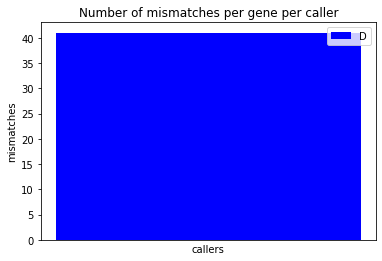

In [52]:
# MAIN - misreads by gene graph
misreadsbygene_dict = dict()
alltools = list()

for key,value in tool_names_and_loc.items():
  dataset1 = pd.read_csv(value)
  dataset1=dataset1.set_index(dataset1.columns[0])
  mask = dataset1.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
  dataset1=dataset1.loc[: , mask]
  dataset1=dataset1.reset_index()
  datasets_cleaned=cleaning_data(dataset1, gold_standard_dataset1)
  dataset1=datasets_cleaned[0]
  gold_standard_dataset1=datasets_cleaned[1]
  alltools.append(key)

  misreadsbygene_dict[key] = misreadsbygene(dataset1, gold_standard_dataset1, key)
  '''
  dataset1 = dataframes[0]
  gold_standard_dataset1 = dataframes[1]
  misread_genes=gene_misread(dataset1, gold_standard_dataset1, tool_name)
  all_data.append(misread_genes)
  '''

df = misread_gene_plot(misreadsbygene_dict)
print(alltools)
df['tools']=np.array(alltools)
#https://thispointer.com/pandas-convert-a-dataframe-column-into-a-list-using-series-to_list-or-numpy-ndarray-tolist-in-python/
#https://stackoverflow.com/questions/51865367/cannot-convert-the-series-to-class-int
DRB1= df['DRB1'].astype(int).to_list()
X = df['tools']

#https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
#https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
x = np.arange(len(X))
ax = plt.subplot(111)
ax.bar(x-0.2, DRB1, width=0.2, color='b', align='center')

plt.xticks(x, X)
plt.xlabel("callers")
plt.ylabel("mismatches")
plt.title("Number of mismatches per gene per caller")
plt.legend((('DRB1')))
plt.show()

#df.to_csv('misreadsbygene.csv', index=False)
#categorical_data = sns.load_dataset('/content/misreadsbygene.csv')


In [9]:
df

NameError: name 'df' is not defined